# Exercise 6: Classification with Support Vector Machines
-------------------------------
Machine learning algorithms are used in various fields to automatically extract information from data. Among other things, they can be used in medicine to assist in diagnosing certain diseases.

In this exercise, we are going to analyze a heart disease dataset. The database contains data from 303 patients collected at Cleveland Hospital. The goal is to diagnose the presence of heart diseases based on the attributes in the dataset using a support vector machine.

The dataset in Moodle was extracted from a publication in the UCI Machine Learning Repository: [Link to complete heart disease dataset](http://archive.ics.uci.edu/dataset/45/heart+disease), but we will concentrate on the part of the data that we uploaded to Moodle.

In total, the dataset contains 14 attributes:
- age: age of the patients
- sex: sex of the patients (1 = male, 0 = female)
- cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- trestbps: resting blood pressure in mm Hg on admission to the hospital
- chol: serum cholesterol in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- ca: number of major vessels (0-3) colored by flouroscopy
- thal: (3 = normal, 6 = fixed defect, 7 = reversable defect)
- num: diagnosis of heart disease (integer valued from 0 (no presence) to 4)



## Task 1: Explore data
Load the data from the file *processed.cleveland.data* into a *pandas* dataframe and take a first look into the data. Inspect the distributions of the attributes: are there any missing values or outliers?

In [1]:
#import data

import pandas as pd

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('heart+disease/processed.cleveland.data', sep=',', header=None, names=column_names)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


The two variables *ca* and *thal* are of object type, but should be numeric. This might be an indicator for missing values. For the other variables, the *describe* function shows the distribution of values. Here, there are no obviously false values.

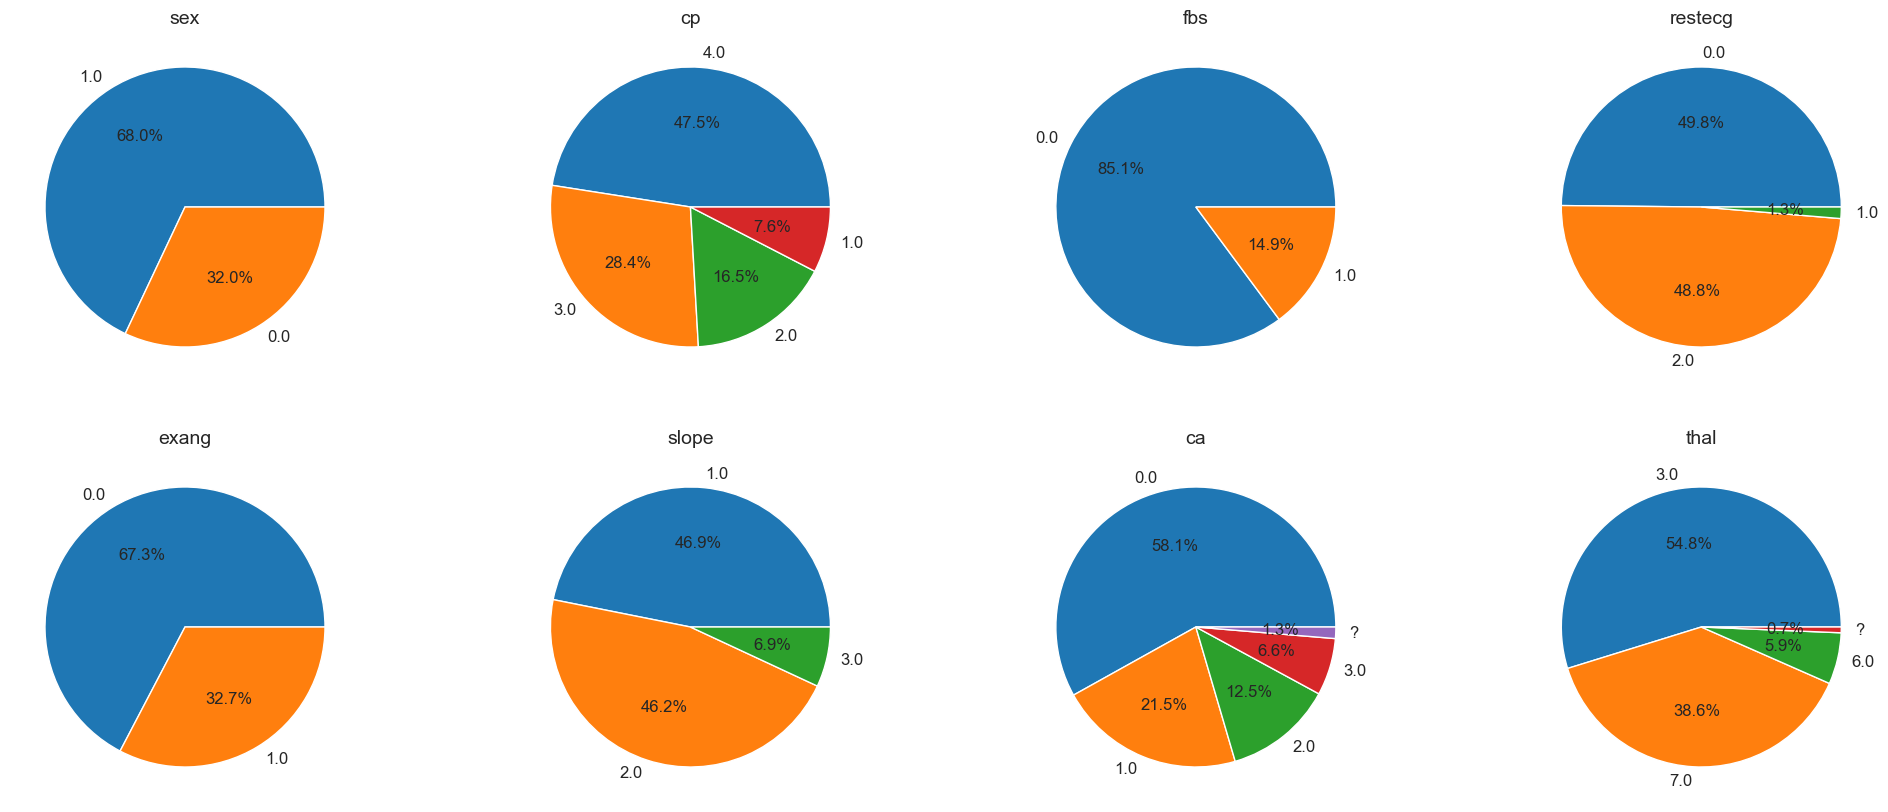

In [4]:
# categorical and ordinal variables

cat_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
for i in range(len(cat_var)):
    var = cat_var[i]
    values = data[var].value_counts()
    plt.subplot(2,4,i+1)
    plt.pie(values, labels=values.index, autopct='%.1f%%', textprops={'fontsize':12})
    plt.title(var, fontsize='14')

plt.show()

In the pie charts, we can see that the missing values of the *ca* and *thal* variables are marked as '?'. For the other variables, the observed values correspond to the variable description above. Not all variables are balanced, for example more than two thirds of the patients are male and less than one third are female.

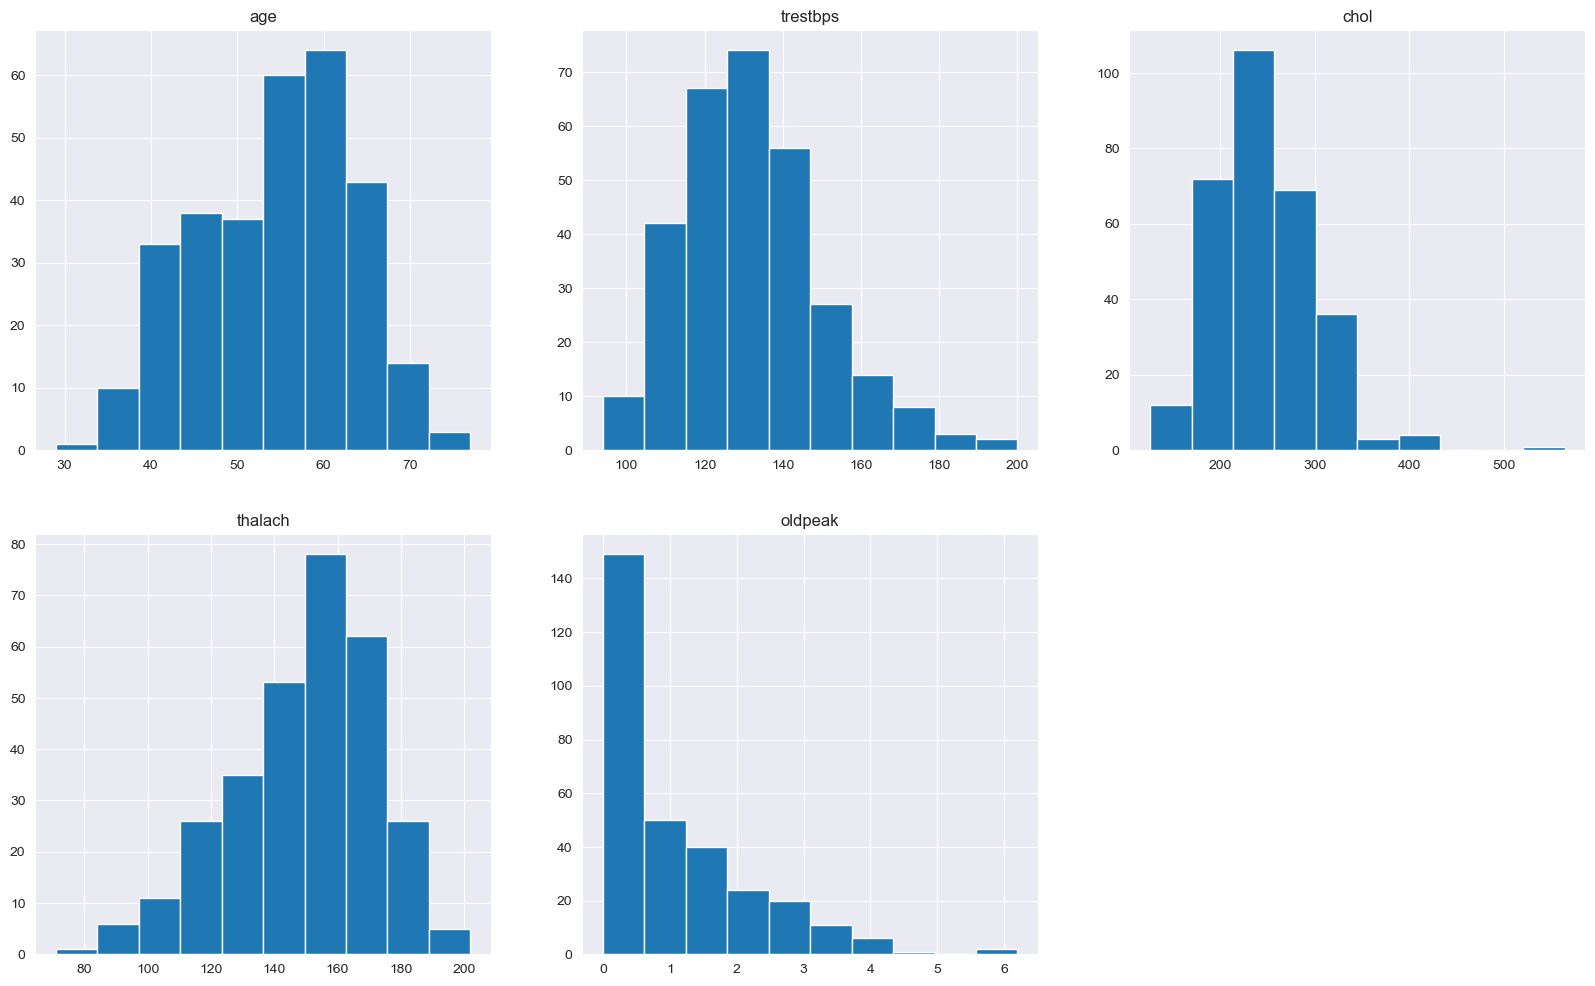

In [5]:
# numerical variables

num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(20,12))
for i in range(len(num_var)):
    sbp = plt.subplot(2,3,i+1)
    var = num_var[i]
    data[var].hist()
    sbp.set_title(var)

plt.show()

Most of the numerical variables seem approximately normally distributed, but are a little skewed. The *oldpeak* variable has its mean value close to zero and then a descending distribution. There are some upper outliers, for example in the *chol* and the *oldpeak* attributes. But these outliers are not obviously false values and should therefore stay in the dataset.

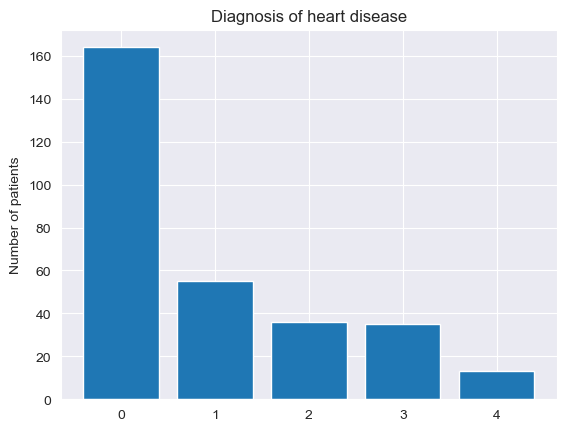

In [6]:
# target variable

targets = data['num'].value_counts()

plt.bar(targets.index, targets)
plt.title('Diagnosis of heart disease')
plt.ylabel('Number of patients')
plt.show()

More than 160 of the patients are diagnosed as having no heart disease (label 0). This is a little more than 50 % of the total number of patients. The other half of the patients are classified with labels 1 to 4 which signify increasing signs of heart disease. In the later part of this exercise, we will concentrate on distinguishing between no signs of heart disease (label 0) and heart disease (labels 1-4).

## Task 2: Data Preparation
Before the support vector machine can be trained to diagnose the heart diseases, the data set must be prepared. Execute the following steps for data preparation:

a) Replace missing values! As the dataset is quite small, we do not want to delete the patients with missing data. A reasonable method for replacement is to use median imputation where the median is calculated per class.

In [7]:
# inspect missing values
miss_val = data[(data['ca'] == '?') | (data['thal'] == '?')]

miss_val

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are in total 6 missing values, four patients have no known *ca* attribute, two have no knwon *thal* value.

In [8]:
# class-wise median imputation

# replace ? with nan values to compute the median
import numpy as np
data = data.replace('?', np.nan)

# ca attribute
miss_ca = data[data['ca'].isna() == True]

for ind in miss_ca.index:
    # get class of patients and calculate the median value for this class
    num_class = miss_ca.num[ind]
    median = data[data['num'] == num_class].ca.median()
    data.loc[ind, ['ca']] = median
# correct data type
data.ca = data.ca.astype(float)

# thal attribute
miss_thal = data[data['thal'].isna() == True]

for ind in miss_thal.index:
    # get class of patients and calculate the median value for this class
    num_class = miss_thal.num[ind]
    median = data[data['num'] == num_class].thal.median()
    data.loc[ind, ['thal']] = median
# correct data type
data.thal = data.thal.astype(float)

# inspect imputed values
data.iloc[miss_val.index]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,3.0,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,1.0,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,7.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,0.0,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


b) Generate the target value to perform a binary classification! The goal is to differentiate between no signs of heart disease (*num* = 0) and signs of heart disease (*num* = 1-4).

In [9]:
data['num'].loc[data['num'] >= 1] = 1
print(data['num'].value_counts())

# generate targets
Y = data['num']

num
0    164
1    139
Name: count, dtype: int64


C:\Users\schmidt\AppData\Local\Temp\ipykernel_27604\3290918100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num'].loc[data['num'] >= 1] = 1


c) Use one-hot-encoding to encode categorical features. You can use the *get_dummies* function from *pandas* for this task.

In [10]:
# One-hot-encoding of categorical variables
# binary categorical variables sex, fbs and exang do not have to be encoded
# ca variable is ordinal, no one-hot-encoding needed

# variables to be encoded
encode_var = ['cp', 'restecg', 'slope', 'thal']

features = data.drop(['num'], axis=1)

enc_features = pd.get_dummies(features, columns=encode_var, drop_first=True, dtype=int)

enc_features.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,0,0


d) Normalize the features, so that all the features are within a range from 0 (minimum value) to 1 (maximum value).

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(enc_features)


## Task 3: Support Vector Machine
Split the dataset into a training and a test set. Use a linear support vector machine to perform a heart disease classification on the patients. Evaluate the error of the support vector machine both on the training and the test set.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# we choose a test size of 20%
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=17)

classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)



Accuracy on training set: 0.87
Recall on training set: 0.81


Text(52.72222222222221, 0.5, 'True class')

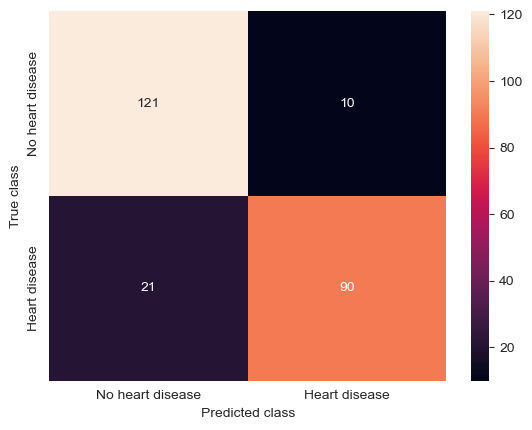

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
# results on training data
cf_train = confusion_matrix(y_train, y_train_pred)

print('Accuracy on training set: {:.2f}'.format(accuracy_score(y_train, y_train_pred)))
print('Recall on training set: {:.2f}'.format(recall_score(y_train, y_train_pred)))
sns.heatmap(cf_train, annot=True, xticklabels=['No heart disease', 'Heart disease'], yticklabels=['No heart disease', 'Heart disease'], fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')

Accuracy on test set: 0.82
Recall on test set: 0.71


Text(52.72222222222221, 0.5, 'True class')

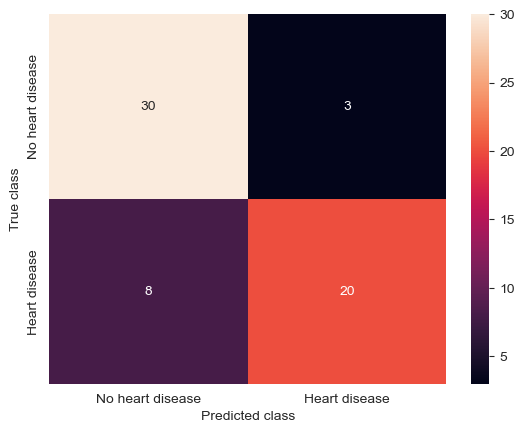

In [14]:
cf_test = confusion_matrix(y_test, y_test_pred)

print('Accuracy on test set: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
print('Recall on test set: {:.2f}'.format(recall_score(y_test, y_test_pred)))
sns.heatmap(cf_test, annot=True, xticklabels=['No heart disease', 'Heart disease'], yticklabels=['No heart disease', 'Heart disease'], fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')

The support vector machine already shows good results with 87 % accuracy on the training set and 82 % accuracy on the test set. There is some overfitting, the training results are a little better than the test results.

The confusion matrix also show that the number of false negatives is higher than the number of false positives, leading to a rather low recall. Since undetected heart diseases can have fatal consequences, this is not what we want to have. To apply the algorithm for real diagnosis with reliable results, the recall must be much higher.

## Task 4: Cross-Validation
Try to optimize the results from task 3 by applying a hyperparameter grid search. The most important hyperparameter of the *scikit-learn* support vector classifier is the *C* parameter.It is a regularization parameter that determines the penalty for misclassified data points and trades off the correct classification of training points against maximization of the margin of the decision function.

a) Perform a grid search for different values of *C* and evaluate the results using cross-validation on the training set. Decide which scoring method you want to use for the model evaluation. You can use the *GridSearchCV* function from *scikit-learn* to perform the grid search in combination with cross-validation.

In [15]:
# cross-validation
from sklearn.model_selection import KFold, GridSearchCV

cv_classifier = SVC(kernel='linear')
kf = KFold(n_splits=5, shuffle=False) # 5 splits for the cross-validation

# values for the hyperparameter optimization
params = {'C': [0.01, 0.1, 1, 10, 100]}

# which metric to optimize?
grid = GridSearchCV(cv_classifier, params, scoring='recall')

grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='recall')

In [16]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00402751, 0.00221958, 0.00219994, 0.00297995, 0.01391692]), 'std_fit_time': array([9.22878840e-04, 3.58773007e-04, 7.44055950e-04, 3.43618663e-05,
       4.64925307e-03]), 'mean_score_time': array([0.00473204, 0.00219975, 0.00322061, 0.00240102, 0.00280428]), 'std_score_time': array([0.00084859, 0.00084652, 0.00076925, 0.0007978 , 0.00070432]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.73913043, 0.7826087 , 0.7826087 , 0.7826087 , 0.7826087 ]), 'split1_test_score': array([0.59090909, 0.72727273, 0.68181818, 0.77272727, 0.81818182]), 'split2_test_score': array([0.81818182, 0.86363636, 0.90909091, 0.90909091, 0.86363636]), 'split3_test_score': array([0.59090909, 0.81818182, 0.77272727, 0.81818182, 0.77272727]), 'split4_test_score': array([0.7272727

In [17]:
print(grid.best_params_)

{'C': 0.1}


We have used the recall score as evaluation metric. A high recall means that there is a low number of false negatives, that means a low number of undetected heart diseases. In cross-validation, the parameter *C = 0.1* has the best average recall score. Thus, we will use this value for further mdoel building.

The advantage of cross-validation is that we can use all of our training data for hyperparameter optimization. If we would like to perform hyperparameter optimization without cross-validation, we would have to further divide our training data into a smaller training set and a validation set.

b) Retrain the best classifier with the best parameters on the whole training set and evaluate its performance on the test set. Does the classifier perform better than the one from task 3?

Accuracy on training set: 0.84
Recall on training set: 0.81


Text(52.72222222222221, 0.5, 'True class')

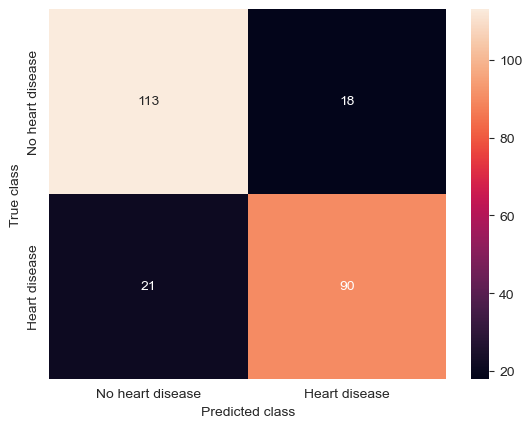

In [18]:
# retrain with best parameter

best_classifier = SVC(kernel='linear', C=0.1)
best_classifier.fit(x_train, y_train)

y_train_pred = best_classifier.predict(x_train)
y_test_pred = best_classifier.predict(x_test)

cf_train = confusion_matrix(y_train, y_train_pred)

print('Accuracy on training set: {:.2f}'.format(accuracy_score(y_train, y_train_pred)))
print('Recall on training set: {:.2f}'.format(recall_score(y_train, y_train_pred)))
sns.heatmap(cf_train, annot=True, xticklabels=['No heart disease', 'Heart disease'], yticklabels=['No heart disease', 'Heart disease'], fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')


Accuracy on test set: 0.85
Recall on test set: 0.79


Text(52.72222222222221, 0.5, 'True class')

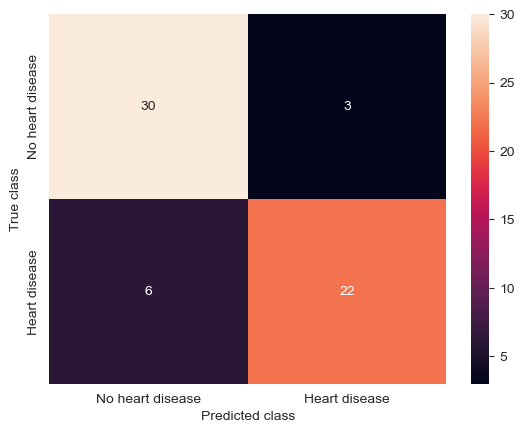

In [19]:
cf_test = confusion_matrix(y_test, y_test_pred)

print('Accuracy on test set: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
print('Recall on test set: {:.2f}'.format(recall_score(y_test, y_test_pred)))
sns.heatmap(cf_test, annot=True, xticklabels=['No heart disease', 'Heart disease'], yticklabels=['No heart disease', 'Heart disease'], fmt='d')
plt.xlabel('Predicted class')
plt.ylabel('True class')

The optimized classifier performs better than the one from task 3. Now, the recall on the test set is at 79 %. Moreover, there is less overfitting: the test results are closer to the training results. However, the percentage of undetected heart diseases is still too high for an application in a real-world scenario.